In [ ]:
EG/2018/3503
EE7204 – Computer vision and Image Processing
Take Home Assignment 1

1. To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2 The desired number of intensity levels needs to be a variable input to your program.

Enter the desired number of intensity levels: 4


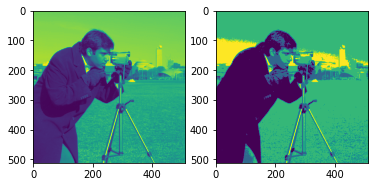

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data


image = data.camera()

levels = int(input("Enter the desired number of intensity levels: "))
dev = 255/(levels-1)
newImage = np.round(image/dev)*dev
fig,arr = plt.subplots(1,2)
arr[0].imshow(image)
arr[1].imshow(newImage)


2. Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the
process for a 10x10 neighborhood and again for a 20x20 neighborhood

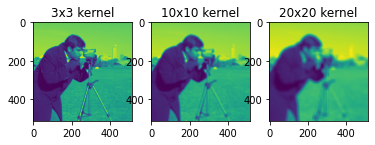

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data


image = data.camera()


#Using openCV to blur the image using a normalized block filter
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(cv2.blur(image,(3,3)))
axarr[0].set_title('3x3 kernel')

axarr[1].imshow(cv2.blur(image,(10,10)))
axarr[1].set_title('10x10 kernel')

axarr[2].imshow(cv2.blur(image,(20,20)))
axarr[2].set_title('20x20 kernel');

3. Rotate an image by 45 and 90 degrees.

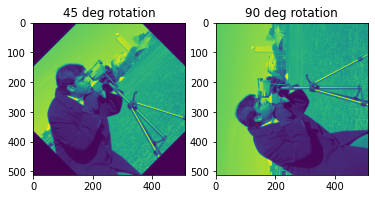

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data


image = data.camera()


rows,cols = image.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst_45 = cv2.warpAffine(image,M,(cols,rows))

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst_90 = cv2.warpAffine(image,M,(cols,rows))

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(dst_45)
axarr[0].set_title('45 deg rotation')

axarr[1].imshow(dst_90)
axarr[1].set_title('90 deg rotation');

4. For every 3×3 block of the image (without overlapping), replace all corresponding 9
pixels by their average. This operation simulates reducing the image spatial resolution.
Repeat this for 5×5 blocks and 7×7 blocks

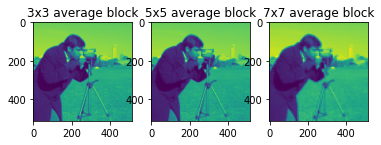

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data


image = data.camera()

STRIDE = (3,5,7)
rows,cols = image.shape

f, axarr = plt.subplots(1, len(STRIDE))

for i,S in enumerate(STRIDE):
    im_mod = image.copy()
    P = round(S/2)
    for r in range(P,rows,S):
        for c in range(P,cols,S):
            im_mod[r-P:r+P+1,c-P:c+P+1] = np.average(image[r-P:r+P+1,c-P:c+P+1])
    axarr[i].imshow(im_mod);
    axarr[i].set_title('{}x{} average block'.format(S,S))

